# Plotting

In [2]:
import contextily as ctx
import geodatasets
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import rioxarray
import shapely
import xarray as xr

import xvec

In [3]:
ds = xr.tutorial.open_dataset("eraint_uvz")
world = gpd.read_file(geodatasets.get_path("geoda natregimes")).to_crs(4326)

/Users/martin/dev/xvec/.pixi/envs/default/lib/python3.13/site-packages/xarray/conventions.py:200: SerializationWarning: variable 'z' has non-conforming '_FillValue' np.float64(nan) defined, dropping '_FillValue' entirely.
  var = coder.decode(var, name=name)
/Users/martin/dev/xvec/.pixi/envs/default/lib/python3.13/site-packages/xarray/conventions.py:200: SerializationWarning: variable 'u' has non-conforming '_FillValue' np.float64(nan) defined, dropping '_FillValue' entirely.
  var = coder.decode(var, name=name)
/Users/martin/dev/xvec/.pixi/envs/default/lib/python3.13/site-packages/xarray/conventions.py:200: SerializationWarning: variable 'v' has non-conforming '_FillValue' np.float64(nan) defined, dropping '_FillValue' entirely.
  var = coder.decode(var, name=name)


In [4]:
aggregated = ds.xvec.zonal_stats(
    world.geometry,
    x_coords="longitude",
    y_coords="latitude",
    method="iterate",  # polygons are small compared to pixels
    all_touched=True,
)

## Plotting DataArray using coordinate geometries

### 2D

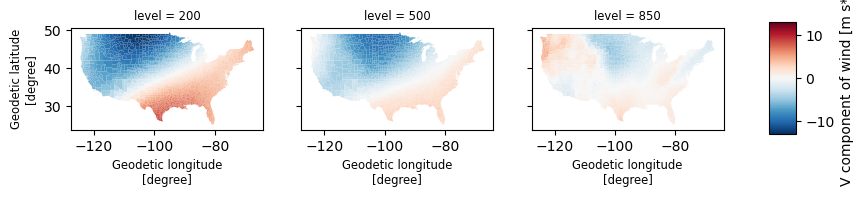

In [5]:
f, ax = aggregated.v.sel(month=1).xvec.plot(col="level")


customisation

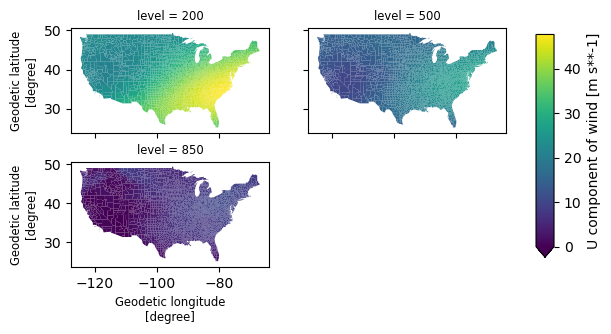

In [6]:
f, ax = aggregated.u.sel(month=1).xvec.plot(
    col="level", col_wrap=2, vmin=0
)

### 3D

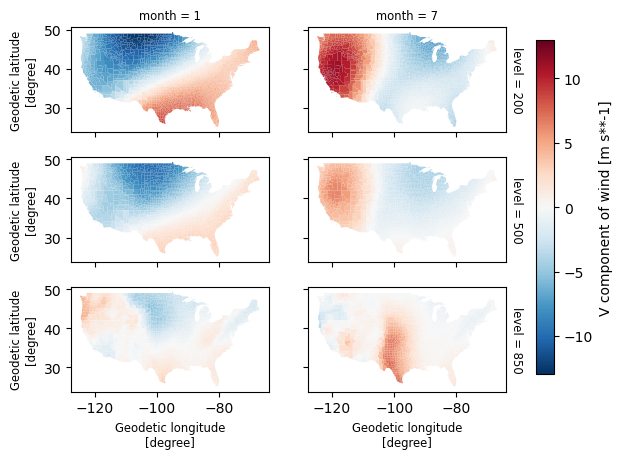

In [7]:
f, ax = aggregated.v.xvec.plot(col="month", row="level")

## Plotting on variable geometry

In [8]:
glaciers_df = gpd.read_file("https://github.com/loreabad6/post/raw/refs/heads/main/inst/extdata/svalbard.gpkg")

In [9]:
glaciers = (
    glaciers_df.set_index(["name", "year"])
    .to_xarray()
    .proj.assign_crs(spatial_ref=glaciers_df.crs)  # use xproj to store the CRS information
)
glaciers

<xarray.Dataset> Size: 432B
Dimensions:      (name: 5, year: 3)
Coordinates:
  * name         (name) object 40B 'Austre Brøggerbreen' ... 'Steenbreen'
  * year         (year) float64 24B 1.936e+03 1.99e+03 2.007e+03
  * spatial_ref  int64 8B 0
Data variables:
    length       (name, year) float64 120B 5.808e+03 5.265e+03 ... 1.819e+03
    fwidth       (name, year) float64 120B 1.254e+03 470.1 888.4 ... 279.4 202.6
    geometry     (name, year) object 120B POLYGON ((432375.11039999966 876165...
Indexes:
    spatial_ref  CRSIndex (crs=EPSG:32633)

In [10]:
glaciers = glaciers.xvec.summarize_geometry(
    dim="name", geom_array="geometry", aggfunc="concave_hull", ratio=0.2
)

(<Figure size 300x211.901 with 1 Axes>,
 <Axes: xlabel='Easting\n[metre]', ylabel='Northing\n[metre]'>)

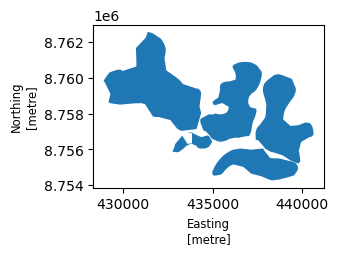

In [11]:
glaciers.xvec.plot(geometry="summary_geometry")

(<Figure size 900x211.901 with 3 Axes>,
 array([[<Axes: title={'center': 'year = 1936.0'}, xlabel='Easting\n[metre]', ylabel='Northing\n[metre]'>,
         <Axes: title={'center': 'year = 1990.0'}, xlabel='Easting\n[metre]'>,
         <Axes: title={'center': 'year = 2007.0'}, xlabel='Easting\n[metre]'>]],
       dtype=object))

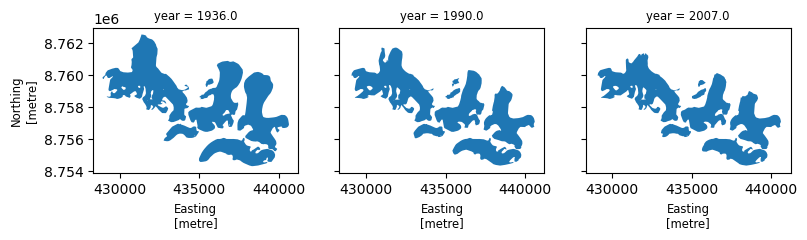

In [12]:
glaciers.geometry.xvec.plot(col="year")

(<Figure size 900x211.901 with 3 Axes>,
 array([[<Axes: title={'center': 'year = 1936.0'}, xlabel='Easting\n[metre]', ylabel='Northing\n[metre]'>,
         <Axes: title={'center': 'year = 1990.0'}, xlabel='Easting\n[metre]'>,
         <Axes: title={'center': 'year = 2007.0'}, xlabel='Easting\n[metre]'>]],
       dtype=object))

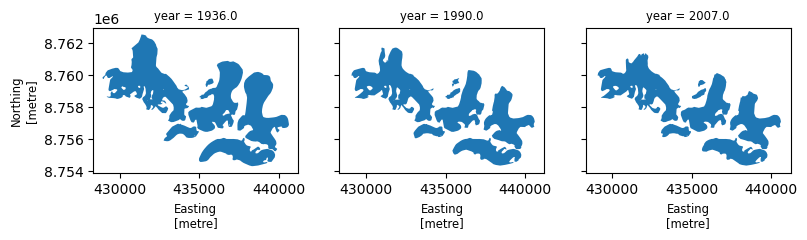

In [13]:
glaciers.xvec.plot(col="year", geometry="geometry")

(<Figure size 900x211.901 with 4 Axes>,
 array([[<Axes: title={'center': 'year = 1936.0'}, xlabel='Easting\n[metre]', ylabel='Northing\n[metre]'>,
         <Axes: title={'center': 'year = 1990.0'}, xlabel='Easting\n[metre]'>,
         <Axes: title={'center': 'year = 2007.0'}, xlabel='Easting\n[metre]'>]],
       dtype=object))

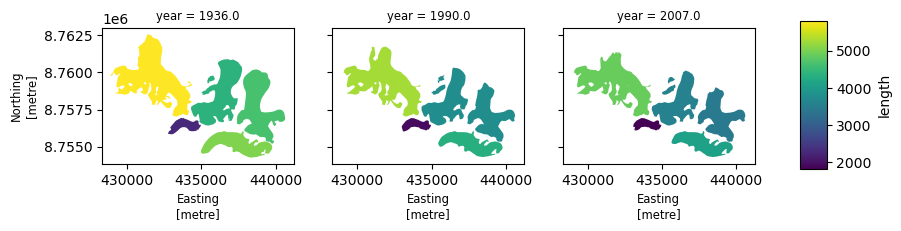

In [14]:
glaciers.xvec.plot(col="year", geometry="geometry", hue="length")

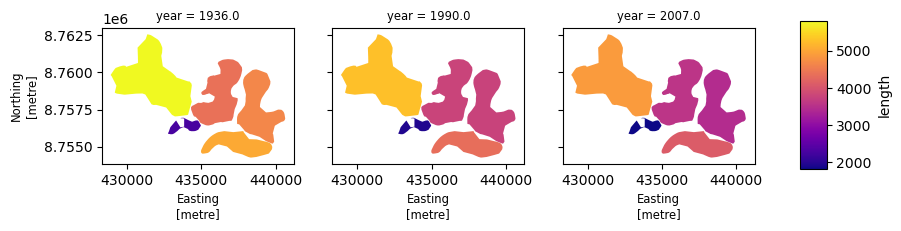

In [15]:
f, axs = glaciers.xvec.plot(
    col="year", geometry="summary_geometry", hue="length", cmap="plasma"
)